In [1]:
def false_position(f, x1, x2, tol=1e-5, max_iter=50):
    if f(x1) * f(x2) > 0:
        raise ValueError("f(x1) and f(x2) must have opposite signs.")
    iterations = []
    xr = x1
    error = None
    for i in range(1, max_iter + 1):
        xr_old = xr
        xr = x2 - (f(x2) * (x1 - x2)) / (f(x1) - f(x2))
        if i > 1:
            error = abs((xr - xr_old) / xr) * 100
        iterations.append([i, x1, x2, xr, f(xr), error])
        if abs(f(xr)) < tol or (error is not None and error < tol):
            break
        if f(x1) * f(xr) < 0:
            x2 = xr
        else:
            x1 = xr
    return iterations, xr


+-------------+----------+------+----------+-----------+----------------------+
|   Iteration |       x1 |   x2 |       xr |     f(xr) |   Relative Error (%) |
+=============+==========+======+==========+===========+======================+
|           1 | 2.000000 |    3 | 2.600000 | -1.824000 |                      |
+-------------+----------+------+----------+-----------+----------------------+
|           2 | 2.600000 |    3 | 2.693252 | -0.237227 |             3.462415 |
+-------------+----------+------+----------+-----------+----------------------+
|           3 | 2.693252 |    3 | 2.704918 | -0.028912 |             0.431320 |
+-------------+----------+------+----------+-----------+----------------------+
|           4 | 2.704918 |    3 | 2.706333 | -0.003495 |             0.052288 |
+-------------+----------+------+----------+-----------+----------------------+
|           5 | 2.706333 |    3 | 2.706504 | -0.000422 |             0.006317 |
+-------------+----------+------+-------

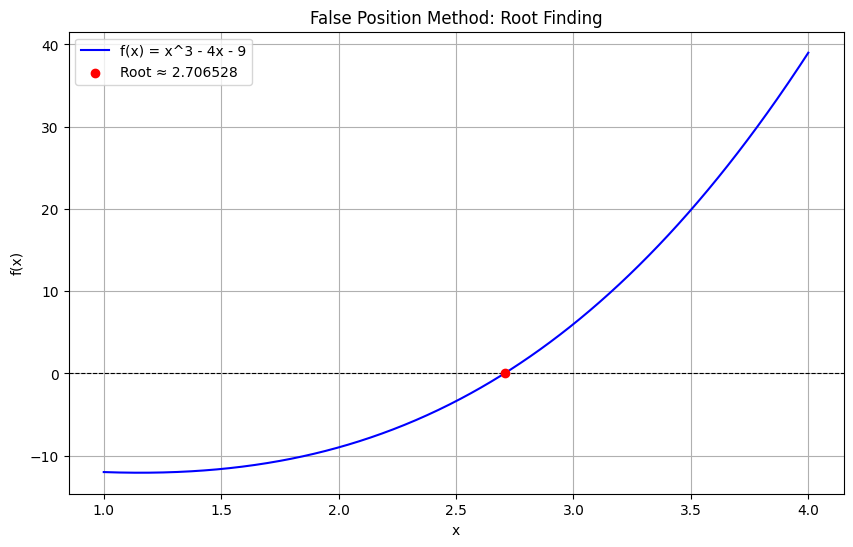

In [5]:
def f(x):
    return x**3 - 4*x - 9

x1, x2 = 2, 3
tolerance = 1e-5

try:
    results, root = false_position(f, x1, x2, tol=tolerance)
    headers = ["Iteration", "x1", "x2", "xr", "f(xr)", "Relative Error (%)"]
    print(tabulate(results, headers=headers, tablefmt="grid", floatfmt=".6f"))
    print(f"\nThe approximate root is: x = {root:.6f}")
    x_vals = np.linspace(x1 - 1, x2 + 1, 500)
    y_vals = f(x_vals)
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label="f(x) = x^3 - 4x - 9", color="blue")
    plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
    plt.scatter([root], [f(root)], color="red", zorder=5, label=f"Root ≈ {root:.6f}")
    plt.title("False Position Method: Root Finding")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.grid()
    plt.show()
except ValueError as e:
    print(e)


## Comparison_between_Regula_vs_Bisection

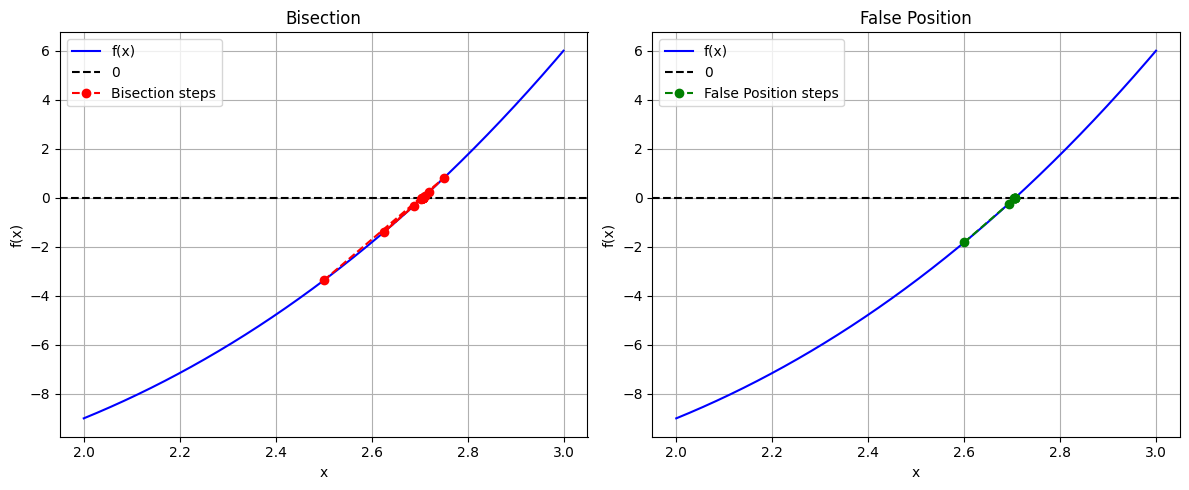

In [6]:
def f(x): return x**3 - 4*x - 9

def bisection(f, a, b, tol=1e-5, max_iter=50):
    results = []
    for i in range(1, max_iter + 1):
        m = (a + b) / 2
        fm = f(m)
        results.append([i, a, b, m, fm])
        if abs(fm) < tol or abs(b - a) / 2 < tol: break
        if f(a) * fm < 0: b = m
        else: a = m
    return results

def false_position(f, x1, x2, tol=1e-5, max_iter=50):
    results = []
    xr = x1
    for i in range(1, max_iter + 1):
        xr_old = xr
        xr = x2 - f(x2)*(x1 - x2)/(f(x1) - f(x2))
        results.append([i, x1, x2, xr, f(xr)])
        if abs(f(xr)) < tol: break
        if f(x1)*f(xr) < 0: x2 = xr
        else: x1 = xr
    return results

x1, x2, tol = 2, 3, 1e-5
bisection_results = bisection(f, x1, x2, tol)
false_pos_results = false_position(f, x1, x2, tol)

import numpy as np, matplotlib.pyplot as plt
x_vals = np.linspace(2, 3, 500)
y_vals = f(x_vals)

def plot_results(results, method, color):
    m_vals = [row[3] for row in results]
    f_vals = [f(m) for m in m_vals]
    plt.plot(x_vals, y_vals, 'b')
    plt.axhline(0, color='black', ls='--')
    plt.plot(m_vals, f_vals, f'{color}o--')
    plt.title(method)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid()
    plt.legend([f"f(x)","0",f"{method} steps"])

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_results(bisection_results, "Bisection", 'r')
plt.subplot(1, 2, 2)
plot_results(false_pos_results, "False Position", 'g')
plt.tight_layout()
plt.show()
